## Import

In [1]:
# importing the libraries
import os
import pandas as pd
import numpy as np
from itertools import chain
from IPython.display import clear_output

# for reading and displaying images
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

# for creating validation set
from sklearn.model_selection import train_test_split

# PyTorch libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F

# models
from src.models.model_util import load_model, save_checkpoint

# other files
from src.training.run import *
from src.data.data_util import *
from utils.kill_desktop_ini import kill_desktop_ini

# Torch
from torch.optim import *
import torch.optim as optim
from torchsummary import summary

# Maintenance
import mlflow
from DeepNotion.build import *

## Load Configurations and set Seed

In [2]:
from src.config import *
cfg = load_config()

random_seed = cfg.seed
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)

## MLFlow Init

In [3]:
exp_name = '3dcnn_smri_comparison_test'
try:
    mlflow.create_experiment(name=exp_name)
except:
    print('Existing experiment')
    
mlflow.set_experiment(exp_name)

Existing experiment


## Tracking on Notion

In [4]:
cfg['notion']['use'] = False

### Load Preexisting page

In [6]:
if cfg['notion']['use']:
    root, client = login(cfg['notion'])
    page = root.children[-1]

### Make New Page

In [18]:
if cfg['notion']['use']:

    print(today())
    root, client = login(cfg['notion'])
    page = make_page(root)

    toggle = page.children.add_new(ToggleBlock, title='Configuration')

    print("Saving Configurations ...")
    for name, value in cfg.get_dict().items():
        if name not in ['notion']:
            txt = '**' + name + '** ' + str(value)
            print(txt)
            toggle.children.add_new(BulletedListBlock, title=txt)

#     fold_db = make_db(page, schema=cfg.schema)
#     test_db = make_db(page, schema=cfg.test_schema)

2021.02.08.20:14


## Train

### No Fold

In [4]:
#################################
### CHANGE CONFIGURATION HERE ###
#################################
cfg.model_name = 'vanilla_residual_past'
cfg.layers = [8, 16, 32, 64]
cfg.registration = 'tlrc'
cfg.batch_size = 16
# cfg.learning_rate = 1e-5 # from checkpoint
#################################
cfg.verbose_period = 1
cfg.refresh()
model, cfg.device = load_model(cfg.model_name, verbose=False, cfg=cfg)
print(cfg.device)

optimizer = optim.Adam(model.parameters(), lr=cfg.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

trn_dp, tst_dp = DataPacket(), DataPacket()

run_date = today().replace('.', '_').replace(':', '') + '_' + cfg.model_name
condition = 'Cherry Pick - TLRC Aug, 100 ep, Vres(past) 8/16/32/64, vperiod=1'

# mlflow.start_run(run_name=condition)

Model Vanilla_residual_past is selected.
cuda:0


Epoch 1 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 141.2 sec [valid] 16.4 sec 
[TRAIN]:: Loss=2961.593 Mae=52.012 Rmse=54.276 Corr=0.185 
[TEST ]:: Loss=2564.799 Mae=47.900 Rmse=50.578 Corr=0.656 


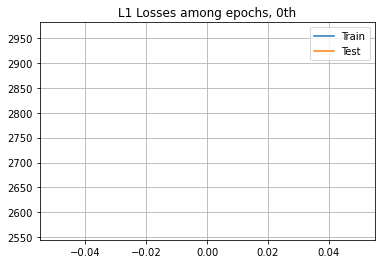

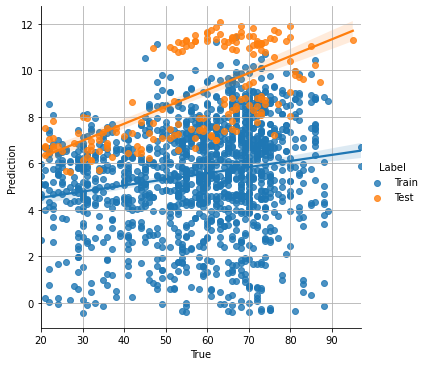

Saving ...
Epoch 2 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 141.1 sec [valid] 16.9 sec 
[TRAIN]:: Loss=2385.679 Mae=46.414 Rmse=48.702 Corr=0.496 
[TEST ]:: Loss=1992.594 Mae=42.070 Rmse=44.576 Corr=0.734 
Saving ...
Epoch 3 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 140.7 sec [valid] 16.7 sec 
[TRAIN]:: Loss=1939.933 Mae=41.694 Rmse=43.890 Corr=0.642 
[TEST ]:: Loss=1894.833 Mae=41.076 Rmse=43.464 Corr=0.790 
Saving ...
Epoch 4 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 142.6 sec [valid] 16.8 sec 
[TRAIN]:: Loss=1551.778 Mae=37.144 Rmse=39.221 Corr=0.726 
[TEST ]:: Loss=1385.993 Mae=35.139 Rmse=37.157 Corr=0.848 
Saving ...
Epoch 5 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 145.0 sec [valid] 17.4 sec 
[TRAIN]:: Loss=1216.565 Mae=32.712 Rmse=34.685 Corr=0.767 
[TEST ]:: Loss=1613.404 Mae=38.235 Rmse=40.111 Corr=0.745 
Saving ...
Epoch 6 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 142.9 sec [valid] 16.7 sec 
[TRAIN]:: Loss=938.050 Mae=28.502 Rmse=30.409 Corr=0.799 
[TEST ]:: Loss=744.4

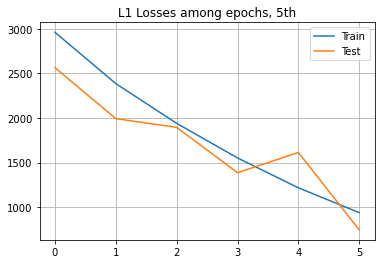

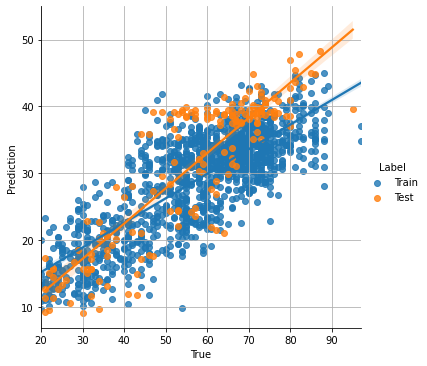

Saving ...
Epoch 7 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 146.8 sec [valid] 19.0 sec 
[TRAIN]:: Loss=706.665 Mae=24.414 Rmse=26.339 Corr=0.812 
[TEST ]:: Loss=1272.152 Mae=33.719 Rmse=35.600 Corr=0.755 
Saving ...
Epoch 8 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 144.1 sec [valid] 16.6 sec 
[TRAIN]:: Loss=530.284 Mae=20.807 Rmse=22.766 Corr=0.828 
[TEST ]:: Loss=631.364 Mae=23.315 Rmse=25.069 Corr=0.848 
Saving ...
Epoch 9 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 141.4 sec [valid] 16.5 sec 
[TRAIN]:: Loss=386.085 Mae=17.466 Rmse=19.335 Corr=0.850 
[TEST ]:: Loss=476.714 Mae=19.032 Rmse=21.725 Corr=0.814 
Saving ...
Epoch 10 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 140.0 sec [valid] 16.4 sec 
[TRAIN]:: Loss=274.783 Mae=14.625 Rmse=16.226 Corr=0.884 
[TEST ]:: Loss=371.285 Mae=16.949 Rmse=19.203 Corr=0.845 
Saving ...
Epoch 11 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 140.7 sec [valid] 16.9 sec 
[TRAIN]:: Loss=188.182 Mae=12.005 Rmse=13.318 Corr=0.904 
[TEST ]:: Loss=135.340 Ma

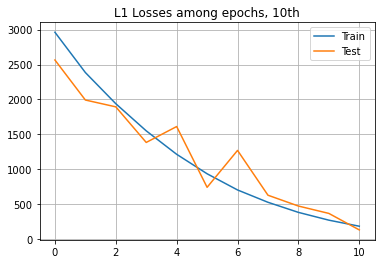

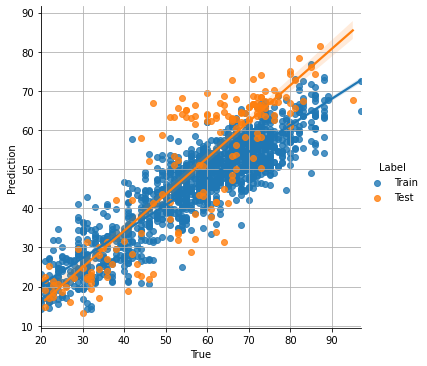

Saving ...
Epoch 12 / 100 | BEST MAE 8.000 | LR 0.0001
[train] 139.7 sec [valid] 16.6 sec 
Saving ...
[TRAIN]:: Loss=128.346 Mae=9.594 Rmse=10.860 Corr=0.914 
[TEST ]:: Loss=90.115 Mae=7.390 Rmse=9.357 Corr=0.878 
Saving ...
Epoch 13 / 100 | BEST MAE 7.390 | LR 0.0001
[train] 140.3 sec [valid] 16.5 sec 
[TRAIN]:: Loss=87.498 Mae=7.676 Rmse=8.923 Corr=0.918 
[TEST ]:: Loss=90.337 Mae=7.989 Rmse=9.395 Corr=0.883 
Saving ...
Epoch 14 / 100 | BEST MAE 7.390 | LR 0.0001
[train] 139.5 sec [valid] 16.6 sec 
Saving ...
[TRAIN]:: Loss=61.669 Mae=6.288 Rmse=7.478 Corr=0.924 
[TEST ]:: Loss=79.223 Mae=6.929 Rmse=8.762 Corr=0.879 
Saving ...
Epoch 15 / 100 | BEST MAE 6.929 | LR 0.0001
[train] 139.7 sec [valid] 16.6 sec 
[TRAIN]:: Loss=50.118 Mae=5.676 Rmse=6.739 Corr=0.928 
[TEST ]:: Loss=86.137 Mae=7.451 Rmse=9.168 Corr=0.876 
Saving ...
Epoch 16 / 100 | BEST MAE 6.929 | LR 0.0001
[train] 139.7 sec [valid] 16.6 sec 
[TRAIN]:: Loss=40.528 Mae=5.061 Rmse=6.117 Corr=0.932 
[TEST ]:: Loss=197.862 Mae

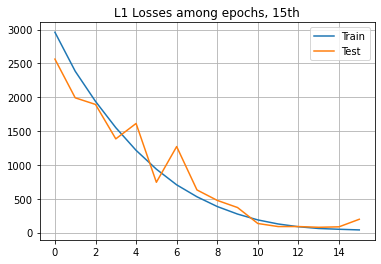

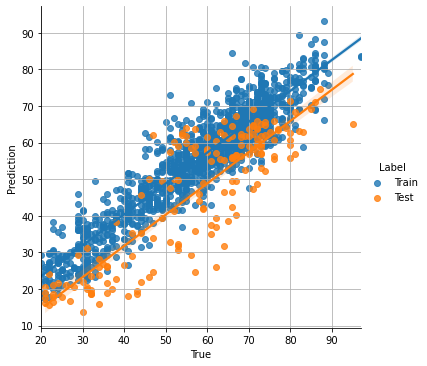

Saving ...
Epoch 17 / 100 | BEST MAE 6.929 | LR 0.0001
[train] 140.9 sec [valid] 16.5 sec 
[TRAIN]:: Loss=37.083 Mae=4.742 Rmse=5.827 Corr=0.934 
[TEST ]:: Loss=95.027 Mae=7.686 Rmse=9.559 Corr=0.869 
Saving ...
Epoch 18 / 100 | BEST MAE 6.929 | LR 0.0001
[train] 139.8 sec [valid] 16.5 sec 
[TRAIN]:: Loss=31.792 Mae=4.335 Rmse=5.348 Corr=0.940 
[TEST ]:: Loss=134.251 Mae=9.000 Rmse=11.380 Corr=0.847 
Saving ...
Epoch 19 / 100 | BEST MAE 6.929 | LR 0.0001
[train] 140.7 sec [valid] 16.6 sec 
[TRAIN]:: Loss=31.024 Mae=4.284 Rmse=5.283 Corr=0.940 
[TEST ]:: Loss=135.940 Mae=9.342 Rmse=11.520 Corr=0.876 
Saving ...
Epoch 20 / 100 | BEST MAE 6.929 | LR 0.0001
[train] 140.3 sec [valid] 16.5 sec 
[TRAIN]:: Loss=30.369 Mae=4.233 Rmse=5.226 Corr=0.942 
[TEST ]:: Loss=97.038 Mae=7.798 Rmse=9.677 Corr=0.865 
Saving ...
Epoch 21 / 100 | BEST MAE 6.929 | LR 0.0001
[train] 140.6 sec [valid] 16.5 sec 
[TRAIN]:: Loss=31.188 Mae=4.199 Rmse=5.271 Corr=0.940 
[TEST ]:: Loss=152.383 Mae=10.110 Rmse=12.262 

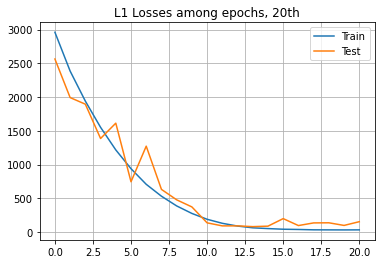

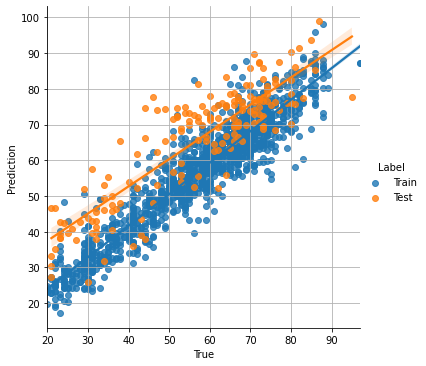

Saving ...
Epoch 22 / 100 | BEST MAE 6.929 | LR 0.0001
[train] 139.8 sec [valid] 16.5 sec 
[TRAIN]:: Loss=30.534 Mae=4.263 Rmse=5.238 Corr=0.941 
[TEST ]:: Loss=93.418 Mae=7.478 Rmse=9.537 Corr=0.880 
Saving ...
Epoch 23 / 100 | BEST MAE 6.929 | LR 0.0001
[train] 140.8 sec [valid] 16.8 sec 
[TRAIN]:: Loss=28.519 Mae=4.063 Rmse=5.055 Corr=0.945 
[TEST ]:: Loss=101.146 Mae=7.970 Rmse=9.956 Corr=0.877 
Saving ...
Epoch 24 / 100 | BEST MAE 6.929 | LR 0.0001
[train] 140.4 sec [valid] 17.1 sec 
[TRAIN]:: Loss=28.206 Mae=4.093 Rmse=5.039 Corr=0.946 
[TEST ]:: Loss=84.568 Mae=7.168 Rmse=9.022 Corr=0.880 
Saving ...
Epoch 25 / 100 | BEST MAE 6.929 | LR 0.0001
[train] 140.2 sec [valid] 16.5 sec 
Saving ...
[TRAIN]:: Loss=28.505 Mae=4.047 Rmse=5.090 Corr=0.945 
[TEST ]:: Loss=76.480 Mae=6.828 Rmse=8.616 Corr=0.881 
Saving ...
Epoch 26 / 100 | BEST MAE 6.828 | LR 0.0001
[train] 140.5 sec [valid] 16.4 sec 
[TRAIN]:: Loss=28.828 Mae=4.138 Rmse=5.066 Corr=0.945 
[TEST ]:: Loss=95.068 Mae=7.630 Rmse=9

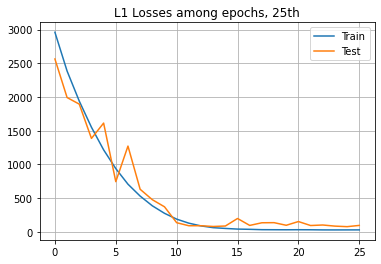

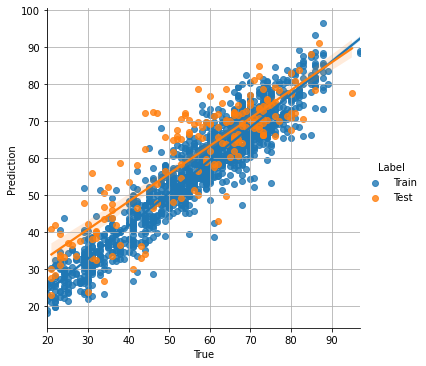

Saving ...
Epoch 27 / 100 | BEST MAE 6.828 | LR 0.0001
[train] 140.3 sec [valid] 16.6 sec 
[TRAIN]:: Loss=29.407 Mae=4.161 Rmse=5.148 Corr=0.943 
[TEST ]:: Loss=82.090 Mae=7.151 Rmse=8.932 Corr=0.878 
Saving ...
Epoch 28 / 100 | BEST MAE 6.828 | LR 0.0001
[train] 142.3 sec [valid] 16.5 sec 
[TRAIN]:: Loss=29.464 Mae=4.133 Rmse=5.103 Corr=0.944 
[TEST ]:: Loss=80.123 Mae=7.165 Rmse=8.816 Corr=0.871 
Saving ...
Epoch 29 / 100 | BEST MAE 6.828 | LR 0.0001
[train] 140.7 sec [valid] 16.6 sec 
[TRAIN]:: Loss=28.095 Mae=4.098 Rmse=5.004 Corr=0.946 
[TEST ]:: Loss=78.200 Mae=7.052 Rmse=8.688 Corr=0.874 
Saving ...
Epoch 30 / 100 | BEST MAE 6.828 | LR 0.0001
[train] 140.5 sec [valid] 16.5 sec 
[TRAIN]:: Loss=26.136 Mae=3.957 Rmse=4.849 Corr=0.950 
[TEST ]:: Loss=161.652 Mae=10.267 Rmse=12.598 Corr=0.851 
Saving ...
Epoch 31 / 100 | BEST MAE 6.828 | LR 0.0001
[train] 139.9 sec [valid] 16.5 sec 
[TRAIN]:: Loss=25.831 Mae=3.882 Rmse=4.811 Corr=0.950 
[TEST ]:: Loss=118.875 Mae=8.606 Rmse=10.778 Co

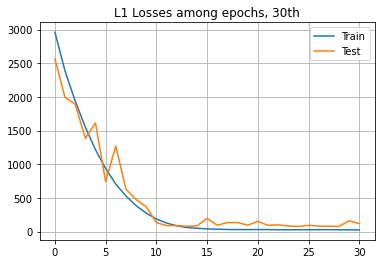

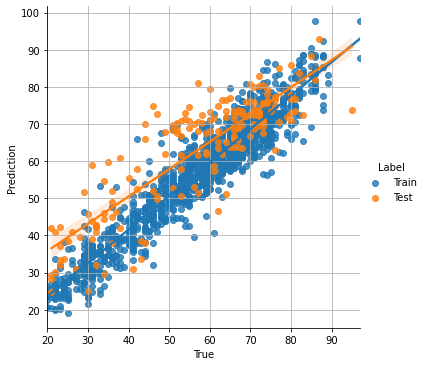

Saving ...
Epoch 32 / 100 | BEST MAE 6.828 | LR 0.0001
[train] 140.8 sec [valid] 16.6 sec 
[TRAIN]:: Loss=25.392 Mae=3.841 Rmse=4.747 Corr=0.951 
[TEST ]:: Loss=83.713 Mae=7.394 Rmse=9.028 Corr=0.870 
Saving ...
Epoch 33 / 100 | BEST MAE 6.828 | LR 0.0001
[train] 140.4 sec [valid] 16.5 sec 
[TRAIN]:: Loss=25.426 Mae=3.839 Rmse=4.720 Corr=0.951 
[TEST ]:: Loss=87.810 Mae=7.519 Rmse=9.258 Corr=0.871 
Saving ...
Epoch 34 / 100 | BEST MAE 6.828 | LR 0.0001
[train] 140.3 sec [valid] 16.5 sec 
[TRAIN]:: Loss=26.158 Mae=3.924 Rmse=4.818 Corr=0.950 
[TEST ]:: Loss=73.012 Mae=6.950 Rmse=8.430 Corr=0.876 
Saving ...
Epoch 35 / 100 | BEST MAE 6.828 | LR 0.0001
[train] 140.1 sec [valid] 16.6 sec 
[TRAIN]:: Loss=24.221 Mae=3.722 Rmse=4.592 Corr=0.953 
[TEST ]:: Loss=78.058 Mae=7.377 Rmse=8.765 Corr=0.869 
Saving ...
Epoch 36 / 100 | BEST MAE 6.828 | LR 0.0001
[train] 140.6 sec [valid] 16.5 sec 
[TRAIN]:: Loss=25.427 Mae=3.855 Rmse=4.760 Corr=0.951 
[TEST ]:: Loss=75.368 Mae=7.176 Rmse=8.561 Corr=0.

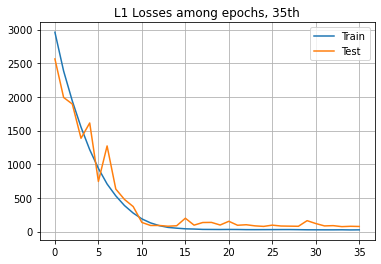

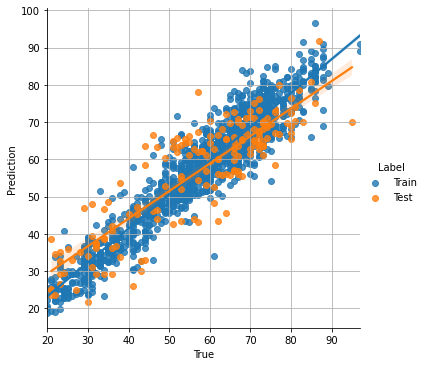

Saving ...
Epoch 37 / 100 | BEST MAE 6.828 | LR 1e-05
[train] 141.1 sec [valid] 16.5 sec 
[TRAIN]:: Loss=23.309 Mae=3.680 Rmse=4.541 Corr=0.955 
[TEST ]:: Loss=71.420 Mae=6.951 Rmse=8.351 Corr=0.880 
Saving ...
Epoch 38 / 100 | BEST MAE 6.828 | LR 1e-05
[train] 141.0 sec [valid] 16.6 sec 
[TRAIN]:: Loss=22.229 Mae=3.569 Rmse=4.419 Corr=0.957 
[TEST ]:: Loss=71.549 Mae=6.990 Rmse=8.366 Corr=0.880 
Saving ...
Epoch 39 / 100 | BEST MAE 6.828 | LR 1e-05
[train] 141.0 sec [valid] 16.5 sec 
[TRAIN]:: Loss=20.750 Mae=3.469 Rmse=4.244 Corr=0.961 
[TEST ]:: Loss=71.794 Mae=6.904 Rmse=8.368 Corr=0.881 
Saving ...
Epoch 40 / 100 | BEST MAE 6.828 | LR 1e-05
[train] 142.0 sec [valid] 17.2 sec 
[TRAIN]:: Loss=19.669 Mae=3.386 Rmse=4.127 Corr=0.963 
[TEST ]:: Loss=71.580 Mae=6.942 Rmse=8.359 Corr=0.881 
Saving ...
Epoch 41 / 100 | BEST MAE 6.828 | LR 1e-05
[train] 141.0 sec [valid] 16.6 sec 
[TRAIN]:: Loss=19.847 Mae=3.429 Rmse=4.174 Corr=0.962 
[TEST ]:: Loss=71.398 Mae=6.931 Rmse=8.358 Corr=0.882 


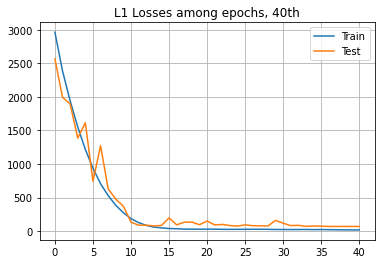

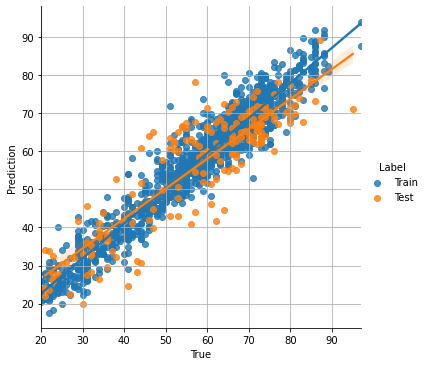

Saving ...
Epoch 42 / 100 | BEST MAE 6.828 | LR 1e-05
[train] 139.8 sec [valid] 16.6 sec 
[TRAIN]:: Loss=20.122 Mae=3.384 Rmse=4.147 Corr=0.962 
[TEST ]:: Loss=70.094 Mae=6.869 Rmse=8.271 Corr=0.883 
Saving ...
Epoch 43 / 100 | BEST MAE 6.828 | LR 1e-05
[train] 140.7 sec [valid] 16.5 sec 
[TRAIN]:: Loss=19.065 Mae=3.331 Rmse=4.060 Corr=0.964 
[TEST ]:: Loss=70.168 Mae=6.859 Rmse=8.271 Corr=0.884 
Saving ...
Epoch 44 / 100 | BEST MAE 6.828 | LR 1e-05
[train] 140.6 sec [valid] 16.6 sec 
[TRAIN]:: Loss=19.337 Mae=3.355 Rmse=4.080 Corr=0.963 
[TEST ]:: Loss=70.277 Mae=6.854 Rmse=8.270 Corr=0.883 
Saving ...
Epoch 45 / 100 | BEST MAE 6.828 | LR 1e-05
[train] 140.4 sec [valid] 16.6 sec 
[TRAIN]:: Loss=19.383 Mae=3.341 Rmse=4.067 Corr=0.963 
[TEST ]:: Loss=69.687 Mae=6.889 Rmse=8.238 Corr=0.883 
Saving ...
Epoch 46 / 100 | BEST MAE 6.828 | LR 1e-05
[train] 140.0 sec [valid] 16.5 sec 
[TRAIN]:: Loss=18.336 Mae=3.257 Rmse=3.944 Corr=0.965 
[TEST ]:: Loss=70.869 Mae=6.850 Rmse=8.302 Corr=0.883 


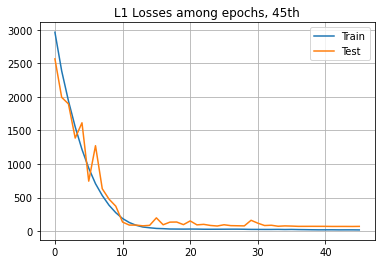

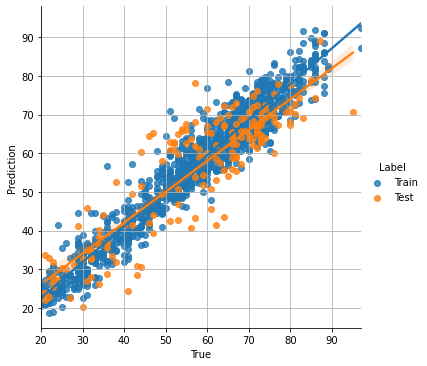

Saving ...
Epoch 47 / 100 | BEST MAE 6.828 | LR 1e-05
[train] 140.1 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.878 Mae=3.244 Rmse=3.917 Corr=0.966 
[TEST ]:: Loss=70.013 Mae=6.912 Rmse=8.260 Corr=0.883 
Saving ...
Epoch 48 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-06
[train] 140.5 sec [valid] 16.6 sec 
[TRAIN]:: Loss=17.749 Mae=3.140 Rmse=3.862 Corr=0.966 
[TEST ]:: Loss=70.260 Mae=6.916 Rmse=8.274 Corr=0.883 
Saving ...
Epoch 49 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-06
[train] 140.4 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.947 Mae=3.175 Rmse=3.916 Corr=0.966 
[TEST ]:: Loss=69.899 Mae=6.906 Rmse=8.251 Corr=0.883 
Saving ...
Epoch 50 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-06
[train] 140.4 sec [valid] 16.4 sec 
[TRAIN]:: Loss=17.407 Mae=3.159 Rmse=3.853 Corr=0.967 
[TEST ]:: Loss=70.080 Mae=6.909 Rmse=8.264 Corr=0.883 
Saving ...
Epoch 51 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-06
[train] 141.2 sec [valid] 16.7 sec 
[TRAIN]:: Loss=17.517 Mae=3.170 Rmse=3.862

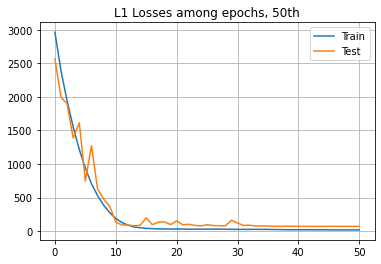

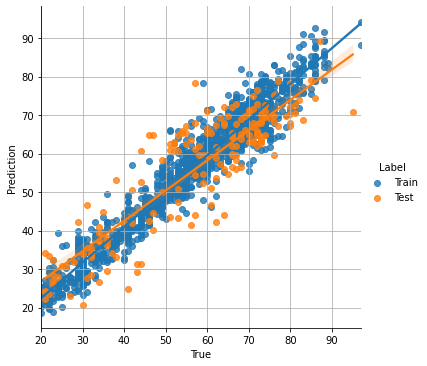

Saving ...
Epoch 52 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-06
[train] 140.2 sec [valid] 16.5 sec 
[TRAIN]:: Loss=16.749 Mae=3.117 Rmse=3.745 Corr=0.968 
[TEST ]:: Loss=70.105 Mae=6.912 Rmse=8.265 Corr=0.883 
Saving ...
Epoch 53 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-06
[train] 140.5 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.680 Mae=3.158 Rmse=3.841 Corr=0.967 
[TEST ]:: Loss=70.459 Mae=6.909 Rmse=8.286 Corr=0.883 
Saving ...
Epoch 54 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-06
[train] 140.0 sec [valid] 16.6 sec 
[TRAIN]:: Loss=17.182 Mae=3.136 Rmse=3.804 Corr=0.967 
[TEST ]:: Loss=70.567 Mae=6.921 Rmse=8.294 Corr=0.883 
Saving ...
Epoch 55 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-06
[train] 140.5 sec [valid] 16.7 sec 
[TRAIN]:: Loss=17.105 Mae=3.108 Rmse=3.790 Corr=0.968 
[TEST ]:: Loss=70.248 Mae=6.912 Rmse=8.272 Corr=0.883 
Saving ...
Epoch 56 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-06
[train] 140.4 sec [valid] 16.9 sec 
[TRAIN]:: Loss=17.166 Mae

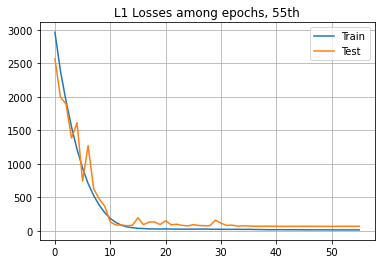

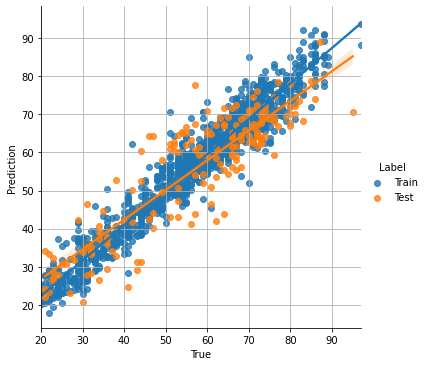

Saving ...
Epoch 57 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-06
[train] 139.9 sec [valid] 16.5 sec 
[TRAIN]:: Loss=16.789 Mae=3.136 Rmse=3.771 Corr=0.968 
[TEST ]:: Loss=70.331 Mae=6.907 Rmse=8.277 Corr=0.883 
Saving ...
Epoch 58 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-06
[train] 141.6 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.447 Mae=3.139 Rmse=3.851 Corr=0.967 
[TEST ]:: Loss=70.161 Mae=6.906 Rmse=8.270 Corr=0.883 
Saving ...
Epoch 59 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-07
[train] 140.1 sec [valid] 16.6 sec 
[TRAIN]:: Loss=16.710 Mae=3.080 Rmse=3.778 Corr=0.968 
[TEST ]:: Loss=70.201 Mae=6.907 Rmse=8.272 Corr=0.883 
Saving ...
Epoch 60 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-07
[train] 140.6 sec [valid] 16.6 sec 
[TRAIN]:: Loss=16.869 Mae=3.108 Rmse=3.764 Corr=0.968 
[TEST ]:: Loss=70.661 Mae=6.922 Rmse=8.301 Corr=0.883 
Saving ...
Epoch 61 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-07
[train] 140.2 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.548 Mae

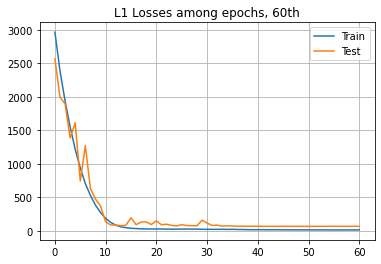

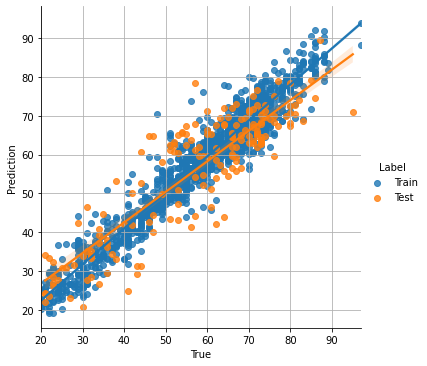

Saving ...
Epoch 62 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-07
[train] 141.1 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.624 Mae=3.117 Rmse=3.857 Corr=0.967 
[TEST ]:: Loss=70.619 Mae=6.924 Rmse=8.299 Corr=0.883 
Saving ...
Epoch 63 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-07
[train] 140.7 sec [valid] 16.4 sec 
[TRAIN]:: Loss=17.281 Mae=3.139 Rmse=3.840 Corr=0.967 
[TEST ]:: Loss=70.463 Mae=6.927 Rmse=8.291 Corr=0.883 
Saving ...
Epoch 64 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-07
[train] 140.6 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.009 Mae=3.110 Rmse=3.798 Corr=0.968 
[TEST ]:: Loss=70.104 Mae=6.893 Rmse=8.262 Corr=0.883 
Saving ...
Epoch 65 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-07
[train] 140.6 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.107 Mae=3.060 Rmse=3.793 Corr=0.968 
[TEST ]:: Loss=70.240 Mae=6.893 Rmse=8.270 Corr=0.883 
Saving ...
Epoch 66 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-07
[train] 140.5 sec [valid] 16.5 sec 
[TRAIN]:: Loss=16.804 Mae

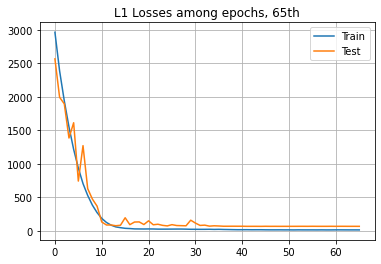

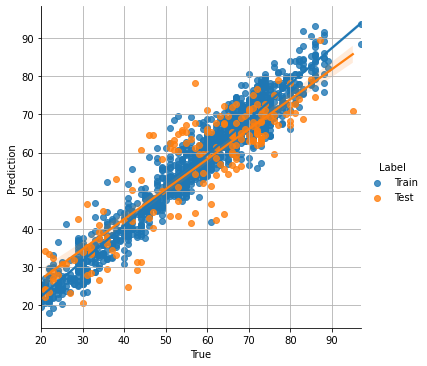

Saving ...
Epoch 67 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-07
[train] 140.5 sec [valid] 16.6 sec 
[TRAIN]:: Loss=17.147 Mae=3.158 Rmse=3.833 Corr=0.968 
[TEST ]:: Loss=70.041 Mae=6.899 Rmse=8.259 Corr=0.883 
Saving ...
Epoch 68 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-07
[train] 140.7 sec [valid] 16.5 sec 
[TRAIN]:: Loss=16.502 Mae=3.095 Rmse=3.762 Corr=0.969 
[TEST ]:: Loss=70.223 Mae=6.912 Rmse=8.273 Corr=0.883 
Saving ...
Epoch 69 / 100 | BEST MAE 6.828 | LR 1.0000000000000002e-07
[train] 140.6 sec [valid] 16.4 sec 
[TRAIN]:: Loss=17.005 Mae=3.136 Rmse=3.813 Corr=0.968 
[TEST ]:: Loss=70.170 Mae=6.903 Rmse=8.268 Corr=0.883 
Saving ...
Epoch 70 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.4 sec [valid] 16.5 sec 
[TRAIN]:: Loss=16.960 Mae=3.125 Rmse=3.785 Corr=0.968 
[TEST ]:: Loss=70.307 Mae=6.909 Rmse=8.276 Corr=0.883 
Saving ...
Epoch 71 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 141.0 sec [valid] 16.5 sec 
[TRAIN]:: Loss=16.996 Mae

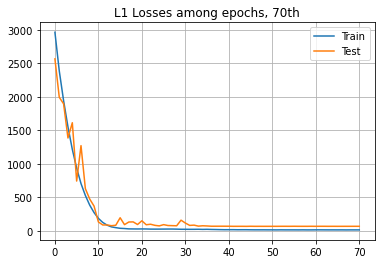

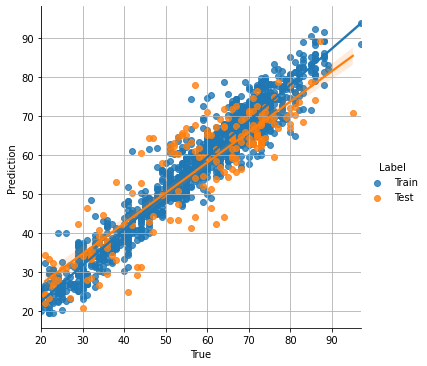

Saving ...
Epoch 72 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.1 sec [valid] 17.0 sec 
[TRAIN]:: Loss=16.775 Mae=3.111 Rmse=3.772 Corr=0.968 
[TEST ]:: Loss=70.806 Mae=6.928 Rmse=8.310 Corr=0.883 
Saving ...
Epoch 73 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.7 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.641 Mae=3.171 Rmse=3.873 Corr=0.967 
[TEST ]:: Loss=70.943 Mae=6.932 Rmse=8.318 Corr=0.883 
Saving ...
Epoch 74 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 141.4 sec [valid] 16.4 sec 
[TRAIN]:: Loss=16.872 Mae=3.119 Rmse=3.804 Corr=0.968 
[TEST ]:: Loss=70.147 Mae=6.907 Rmse=8.267 Corr=0.883 
Saving ...
Epoch 75 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.3 sec [valid] 16.6 sec 
[TRAIN]:: Loss=17.466 Mae=3.145 Rmse=3.879 Corr=0.967 
[TEST ]:: Loss=70.544 Mae=6.922 Rmse=8.293 Corr=0.883 
Saving ...
Epoch 76 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.6 sec [valid] 16.5 sec 
[TRAIN]:: Loss=16.814 Mae

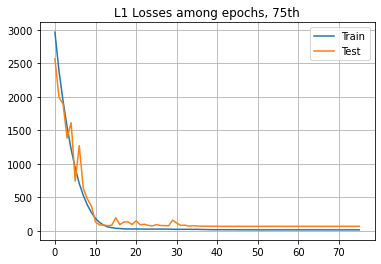

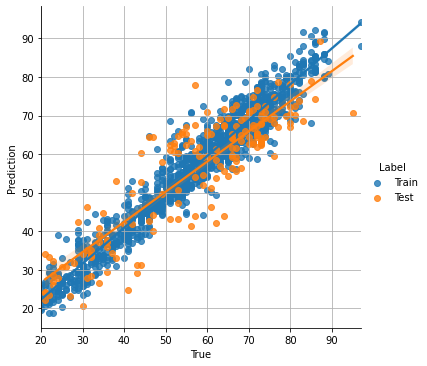

Saving ...
Epoch 77 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 141.3 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.077 Mae=3.075 Rmse=3.794 Corr=0.968 
[TEST ]:: Loss=70.006 Mae=6.897 Rmse=8.257 Corr=0.883 
Saving ...
Epoch 78 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.6 sec [valid] 16.6 sec 
[TRAIN]:: Loss=17.319 Mae=3.140 Rmse=3.860 Corr=0.967 
[TEST ]:: Loss=70.559 Mae=6.921 Rmse=8.294 Corr=0.883 
Saving ...
Epoch 79 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.7 sec [valid] 16.6 sec 
[TRAIN]:: Loss=16.994 Mae=3.100 Rmse=3.801 Corr=0.968 
[TEST ]:: Loss=70.410 Mae=6.915 Rmse=8.284 Corr=0.883 
Saving ...
Epoch 80 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.1 sec [valid] 16.5 sec 
[TRAIN]:: Loss=16.922 Mae=3.133 Rmse=3.802 Corr=0.968 
[TEST ]:: Loss=70.451 Mae=6.914 Rmse=8.286 Corr=0.883 
Saving ...
Epoch 81 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.2 sec [valid] 16.5 sec 
[TRAIN]:: Loss=16.943 Mae

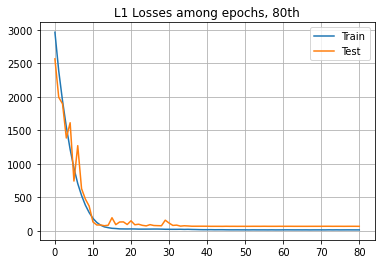

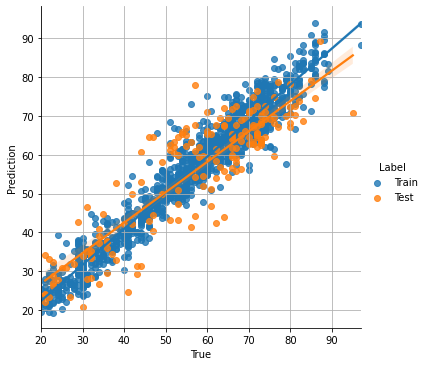

Saving ...
Epoch 82 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.6 sec [valid] 16.7 sec 
[TRAIN]:: Loss=17.718 Mae=3.154 Rmse=3.865 Corr=0.966 
[TEST ]:: Loss=70.592 Mae=6.937 Rmse=8.298 Corr=0.883 
Saving ...
Epoch 83 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.5 sec [valid] 16.4 sec 
[TRAIN]:: Loss=16.840 Mae=3.138 Rmse=3.794 Corr=0.968 
[TEST ]:: Loss=70.607 Mae=6.931 Rmse=8.298 Corr=0.883 
Saving ...
Epoch 84 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.4 sec [valid] 16.5 sec 
[TRAIN]:: Loss=16.888 Mae=3.082 Rmse=3.787 Corr=0.968 
[TEST ]:: Loss=70.847 Mae=6.939 Rmse=8.313 Corr=0.883 
Saving ...
Epoch 85 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.4 sec [valid] 16.9 sec 
[TRAIN]:: Loss=17.796 Mae=3.168 Rmse=3.876 Corr=0.967 
[TEST ]:: Loss=70.629 Mae=6.921 Rmse=8.298 Corr=0.883 
Saving ...
Epoch 86 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 141.7 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.353 Mae

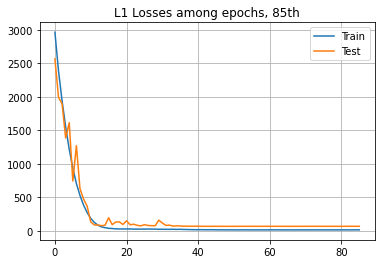

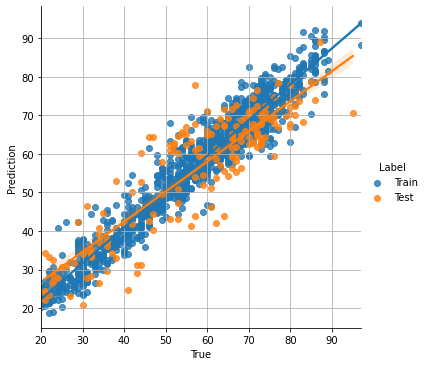

Saving ...
Epoch 87 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.4 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.591 Mae=3.163 Rmse=3.876 Corr=0.967 
[TEST ]:: Loss=70.092 Mae=6.903 Rmse=8.264 Corr=0.883 
Saving ...
Epoch 88 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.9 sec [valid] 16.9 sec 
[TRAIN]:: Loss=17.799 Mae=3.180 Rmse=3.893 Corr=0.966 
[TEST ]:: Loss=70.211 Mae=6.909 Rmse=8.271 Corr=0.883 
Saving ...
Epoch 89 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.6 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.232 Mae=3.111 Rmse=3.824 Corr=0.967 
[TEST ]:: Loss=70.024 Mae=6.904 Rmse=8.259 Corr=0.883 
Saving ...
Epoch 90 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.9 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.754 Mae=3.146 Rmse=3.888 Corr=0.966 
[TEST ]:: Loss=70.730 Mae=6.924 Rmse=8.304 Corr=0.883 
Saving ...
Epoch 91 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.8 sec [valid] 16.6 sec 
[TRAIN]:: Loss=17.183 Mae

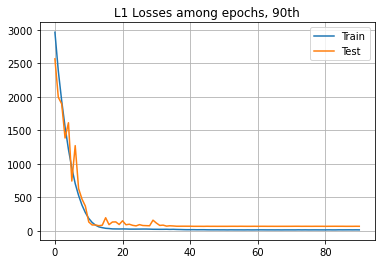

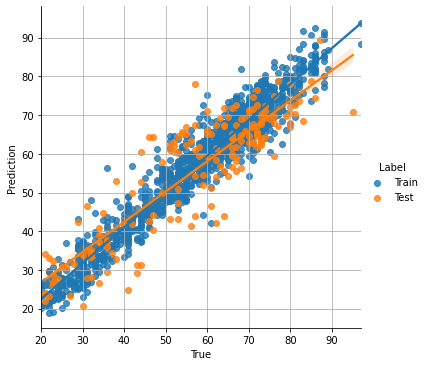

Saving ...
Epoch 92 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 142.1 sec [valid] 16.6 sec 
[TRAIN]:: Loss=16.808 Mae=3.129 Rmse=3.775 Corr=0.968 
[TEST ]:: Loss=70.181 Mae=6.915 Rmse=8.271 Corr=0.883 
Saving ...
Epoch 93 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 141.0 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.382 Mae=3.129 Rmse=3.825 Corr=0.967 
[TEST ]:: Loss=70.491 Mae=6.913 Rmse=8.289 Corr=0.883 
Saving ...
Epoch 94 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.7 sec [valid] 16.6 sec 
[TRAIN]:: Loss=17.563 Mae=3.126 Rmse=3.844 Corr=0.967 
[TEST ]:: Loss=69.939 Mae=6.893 Rmse=8.252 Corr=0.883 
Saving ...
Epoch 95 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 139.9 sec [valid] 16.4 sec 
[TRAIN]:: Loss=16.851 Mae=3.090 Rmse=3.795 Corr=0.968 
[TEST ]:: Loss=70.034 Mae=6.899 Rmse=8.259 Corr=0.883 
Saving ...
Epoch 96 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 141.1 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.356 Mae

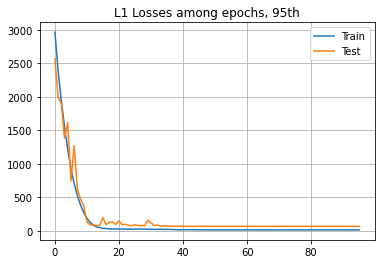

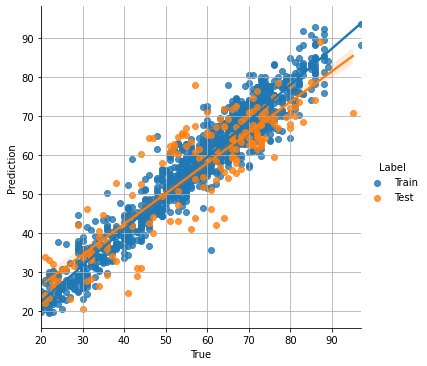

Saving ...
Epoch 97 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 141.2 sec [valid] 16.9 sec 
[TRAIN]:: Loss=16.530 Mae=3.054 Rmse=3.735 Corr=0.969 
[TEST ]:: Loss=70.469 Mae=6.906 Rmse=8.286 Corr=0.883 
Saving ...
Epoch 98 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.7 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.289 Mae=3.126 Rmse=3.818 Corr=0.967 
[TEST ]:: Loss=70.358 Mae=6.914 Rmse=8.281 Corr=0.883 
Saving ...
Epoch 99 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 139.9 sec [valid] 16.6 sec 
[TRAIN]:: Loss=17.258 Mae=3.116 Rmse=3.810 Corr=0.967 
[TEST ]:: Loss=70.194 Mae=6.898 Rmse=8.267 Corr=0.883 
Saving ...
Epoch 100 / 100 | BEST MAE 6.828 | LR 1.0000000000000004e-08
[train] 140.1 sec [valid] 16.5 sec 
[TRAIN]:: Loss=17.484 Mae=3.169 Rmse=3.857 Corr=0.967 
[TEST ]:: Loss=70.181 Mae=6.909 Rmse=8.269 Corr=0.883 
Saving ...
Saving ...


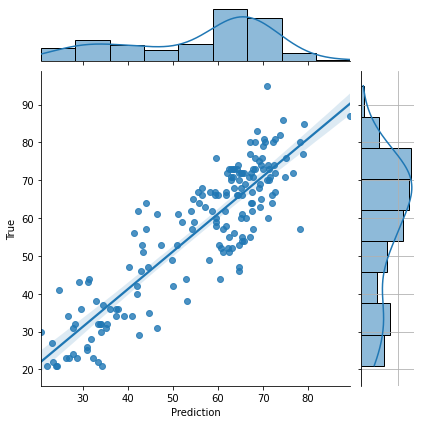

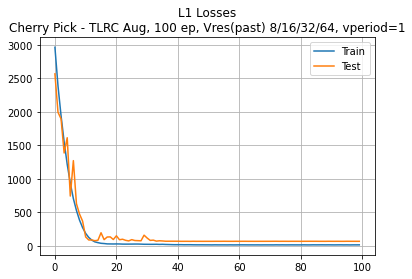

In [5]:
mlflow.start_run(run_name=condition)

fold = None
# cfg.epochs = 200
db = make_db(page, client=client, schema=cfg['notion']['no_fold_aug_schema'], title='Results') if cfg['notion']['use'] else None
for e in range(cfg.epochs):

    start_time = time.time()
    print(f'Epoch {e+1} / {cfg.epochs} | BEST MAE {cfg.best_mae:.3f} | LR {optimizer.param_groups[0]["lr"]}')

    model, trn_dp, trn_res = train(model, optimizer, fn_lst, trn_dp, cfg, fold=fold, augment=True)
    model, tst_dp, tst_res = valid(model, fn_lst, tst_dp, cfg, fold=fold)

    scheduler.step(tst_dp.mae[-1])
    elapsed_time = round(time.time() - start_time, 3)

    if cfg.best_mae > tst_dp.mae[-1]:

        cfg.best_mae = tst_dp.mae[-1]
        model_name = f'{cfg.model_name}_ep{e}-{cfg.epochs}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_date}/', is_best=True)

    df = pd.concat([make_df(trn_res, 'Train'),
                    make_df(tst_res, 'Test')], ignore_index=True)

    trn_dp.corr.update(df[df['Label'] == 'Train'].corr().Prediction['True'])
    trn_dp.refresh()
    tst_dp.corr.update(df[df['Label'] == 'Test'].corr().Prediction['True'])
    tst_dp.refresh()

    if e % 1 == 0:
        trn_dp.info('train')
        tst_dp.info('test ')

    if e % cfg.verbose_period == 0:
        
        if e % 5 == 0:
            plt.title(f"L1 Losses among epochs, {e}th")
            plt.plot(list(trn_dp.loss), label='Train')
            plt.plot(list(tst_dp.loss), label='Test')
            plt.grid(); plt.legend()

            sns.lmplot(data=df, x='True', y='Prediction', hue='Label')
            plt.grid()
            plt.show()

        model_name = f'{cfg.model_name}_ep{e}-{str(cfg.epochs).zfill(3)}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_date}/', is_best=False)

        if db:
            data = gather_data(e=e, time=elapsed_time, cfg=cfg,
                            train=trn_dp, valid=tst_dp)
            write_db(db, data)

    metrics = mlflow_data(time=elapsed_time, train=trn_dp, valid=tst_dp)
    mlflow.log_metrics(metrics, e)

    torch.cuda.empty_cache()

# Save Parameters to MLFlow
cfg.best_mae = min(tst_dp.mae)
cfg.refresh()
params = dict()
for name, value in cfg.get_dict().items():
    if name not in ['notion']:  
        params[name] = str(value)
mlflow.log_params(params)

save_checkpoint(cfg.get_dict(), 'cfg.pt', model_dir=f'./result/models/{run_date}/', is_best=True)

# Save Plots to MLFlow
sns.jointplot(data=df[df['Label'] == 'Test'], x='Prediction', y='True', kind='reg')
plt.grid()
plt.savefig(f'./result/models/{run_date}/test_jointplot.png')
plt.show()
# mlflow.log_artifact(f'./result/models/{run_date}/test_jointplot.png')
plt.close()

plt.title(f"L1 Losses\n{condition}")
plt.plot(list(trn_dp.loss), label='Train')
plt.plot(list(tst_dp.loss), label='Test')
plt.grid(); plt.legend()
plt.savefig(f'./result/models/{run_date}/loss_plot.png')
plt.show()
# mlflow.log_artifact(f'./result/models/{run_date}/loss_plot.png')

mlflow.end_run()
kill_desktop_ini('./mlruns/')

In [6]:
import yaml
cfg.best_mae = min(tst_dp.mae)
with open(f'./result/models/{run_date}/cfg.yml', 'w') as y:
    yaml.dump(cfg.get_dict(), y, default_flow_style=False)

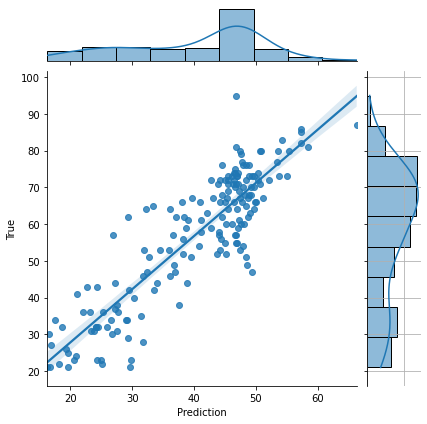

In [7]:
sns.jointplot(data=df[df['Label'] == 'Test'], x='Prediction', y='True', kind='reg')
plt.grid()

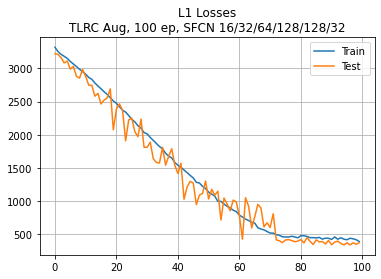

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다: 'G:\\My Drive'

In [8]:
plt.title(f"L1 Losses\n{condition}")
plt.plot(list(trn_dp.loss), label='Train')
plt.plot(list(tst_dp.loss), label='Test')
plt.grid(); plt.legend()
plt.savefig(f'./result/models/{run_date}/loss_plot.png')
plt.show()
mlflow.log_artifact(f'./result/models/{run_date}/loss_plot.png')

### Unexpected stops - checkpoint

Epoch 71 / 100, BEST MAE 8.000
[train] 143.3 sec [valid] 15.6 sec 
Saving ...
[TRAIN]:: Loss=20.076 Mae=3.400 Rmse=4.153 Corr=0.962 
[TEST ]:: Loss=102.631 Mae=7.971 Rmse=10.045 Corr=0.869 


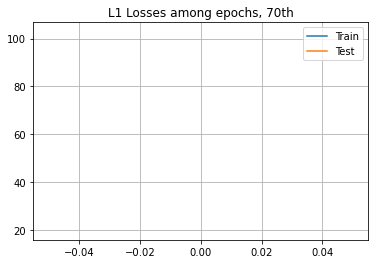

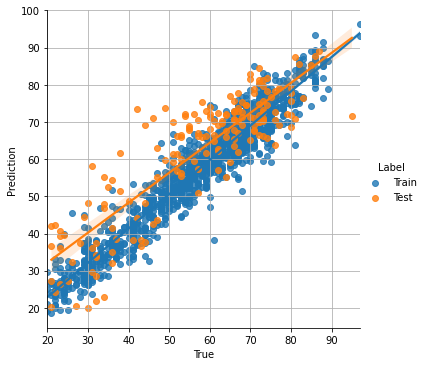

Saving ...
Epoch 72 / 100, BEST MAE 7.971
[train] 142.3 sec [valid] 17.9 sec 
Saving ...
[TRAIN]:: Loss=20.299 Mae=3.535 Rmse=4.220 Corr=0.961 
[TEST ]:: Loss=95.804 Mae=7.885 Rmse=9.686 Corr=0.877 
Epoch 73 / 100, BEST MAE 7.885
[train] 152.2 sec [valid] 15.8 sec 
Saving ...
[TRAIN]:: Loss=20.763 Mae=3.540 Rmse=4.291 Corr=0.960 
[TEST ]:: Loss=94.592 Mae=7.566 Rmse=9.668 Corr=0.866 
Epoch 74 / 100, BEST MAE 7.566
[train] 132.8 sec [valid] 16.0 sec 
[TRAIN]:: Loss=21.296 Mae=3.614 Rmse=4.354 Corr=0.959 
[TEST ]:: Loss=91.199 Mae=7.655 Rmse=9.426 Corr=0.858 
Epoch 75 / 100, BEST MAE 7.566
[train] 210.3 sec [valid] 17.1 sec 
Saving ...
[TRAIN]:: Loss=21.003 Mae=3.559 Rmse=4.307 Corr=0.960 
[TEST ]:: Loss=78.570 Mae=7.098 Rmse=8.799 Corr=0.879 
Epoch 76 / 100, BEST MAE 7.098
[train] 135.8 sec [valid] 15.6 sec 
[TRAIN]:: Loss=20.763 Mae=3.557 Rmse=4.274 Corr=0.960 
[TEST ]:: Loss=115.656 Mae=8.228 Rmse=10.678 Corr=0.838 


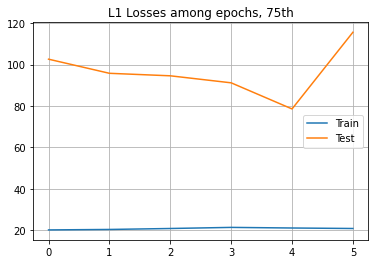

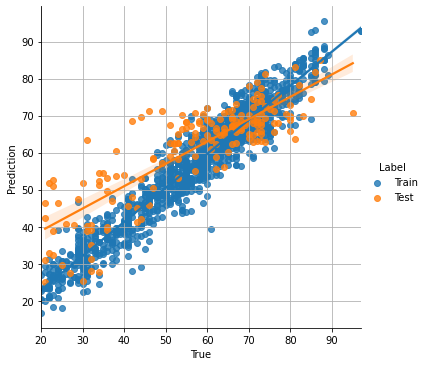

Saving ...
Epoch 77 / 100, BEST MAE 7.098
[train] 136.5 sec [valid] 15.8 sec 
Saving ...
[TRAIN]:: Loss=19.236 Mae=3.485 Rmse=4.111 Corr=0.963 
[TEST ]:: Loss=82.186 Mae=7.033 Rmse=8.960 Corr=0.869 
Epoch 78 / 100, BEST MAE 7.033
[train] 134.6 sec [valid] 15.8 sec 
[TRAIN]:: Loss=19.644 Mae=3.453 Rmse=4.187 Corr=0.962 
[TEST ]:: Loss=166.228 Mae=10.125 Rmse=12.832 Corr=0.838 
Epoch 79 / 100, BEST MAE 7.033
[train] 133.6 sec [valid] 15.7 sec 
[TRAIN]:: Loss=17.960 Mae=3.327 Rmse=3.984 Corr=0.966 
[TEST ]:: Loss=97.050 Mae=7.626 Rmse=9.773 Corr=0.868 
Epoch 80 / 100, BEST MAE 7.033
[train] 134.0 sec [valid] 15.6 sec 
Saving ...
[TRAIN]:: Loss=17.491 Mae=3.246 Rmse=3.921 Corr=0.967 
[TEST ]:: Loss=67.099 Mae=6.547 Rmse=8.090 Corr=0.888 
Epoch 81 / 100, BEST MAE 6.547
[train] 133.9 sec [valid] 15.8 sec 
Saving ...
[TRAIN]:: Loss=16.633 Mae=3.223 Rmse=3.823 Corr=0.968 
[TEST ]:: Loss=68.733 Mae=6.489 Rmse=8.153 Corr=0.887 


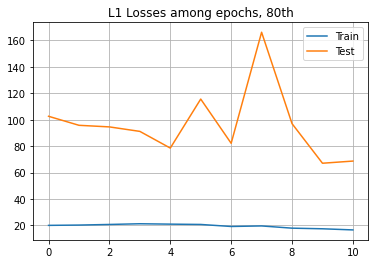

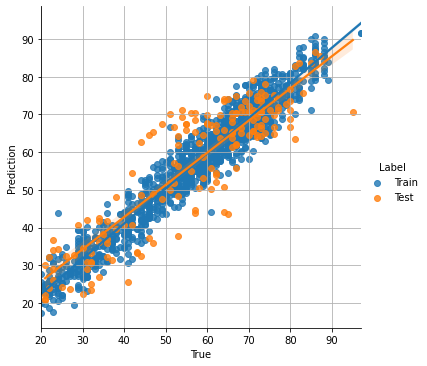

Saving ...
Epoch 82 / 100, BEST MAE 6.489
[train] 133.2 sec [valid] 15.9 sec 
[TRAIN]:: Loss=16.554 Mae=3.222 Rmse=3.822 Corr=0.968 
[TEST ]:: Loss=73.982 Mae=6.966 Rmse=8.506 Corr=0.883 
Epoch 83 / 100, BEST MAE 6.489
[train] 133.0 sec [valid] 15.7 sec 
[TRAIN]:: Loss=18.886 Mae=3.356 Rmse=4.110 Corr=0.964 
[TEST ]:: Loss=152.680 Mae=9.502 Rmse=12.279 Corr=0.832 
Epoch 84 / 100, BEST MAE 6.489
[train] 130.6 sec [valid] 15.6 sec 
[TRAIN]:: Loss=17.393 Mae=3.238 Rmse=3.933 Corr=0.967 
[TEST ]:: Loss=67.707 Mae=6.509 Rmse=8.120 Corr=0.889 
Epoch 85 / 100, BEST MAE 6.489
[train] 132.0 sec [valid] 15.6 sec 
[TRAIN]:: Loss=17.198 Mae=3.246 Rmse=3.951 Corr=0.967 
[TEST ]:: Loss=121.856 Mae=8.870 Rmse=10.928 Corr=0.882 
Epoch 86 / 100, BEST MAE 6.489
[train] 130.9 sec [valid] 15.7 sec 
Saving ...
[TRAIN]:: Loss=16.168 Mae=3.135 Rmse=3.792 Corr=0.969 
[TEST ]:: Loss=63.634 Mae=6.368 Rmse=7.829 Corr=0.894 


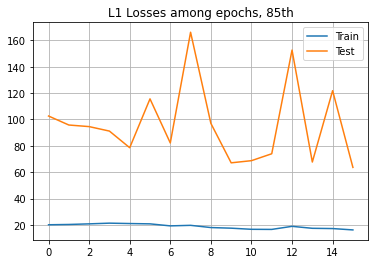

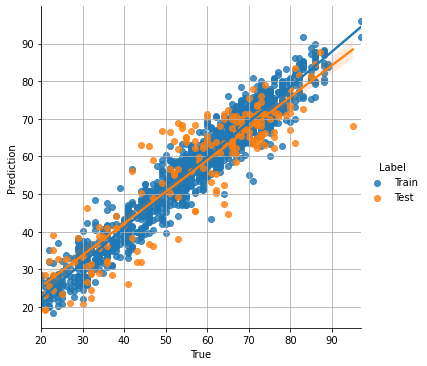

Saving ...
Epoch 87 / 100, BEST MAE 6.368
[train] 131.0 sec [valid] 15.9 sec 
[TRAIN]:: Loss=17.333 Mae=3.239 Rmse=3.948 Corr=0.967 
[TEST ]:: Loss=67.138 Mae=6.578 Rmse=8.050 Corr=0.888 
Epoch 88 / 100, BEST MAE 6.368
[train] 129.7 sec [valid] 15.7 sec 
[TRAIN]:: Loss=16.291 Mae=3.191 Rmse=3.820 Corr=0.969 
[TEST ]:: Loss=75.495 Mae=6.995 Rmse=8.586 Corr=0.886 
Epoch 89 / 100, BEST MAE 6.368
[train] 131.1 sec [valid] 15.6 sec 
[TRAIN]:: Loss=14.925 Mae=3.031 Rmse=3.623 Corr=0.971 
[TEST ]:: Loss=71.263 Mae=6.654 Rmse=8.355 Corr=0.889 
Epoch 90 / 100, BEST MAE 6.368
[train] 129.9 sec [valid] 15.5 sec 
[TRAIN]:: Loss=14.250 Mae=2.962 Rmse=3.566 Corr=0.973 
[TEST ]:: Loss=72.075 Mae=6.836 Rmse=8.383 Corr=0.886 
Epoch 91 / 100, BEST MAE 6.368
[train] 129.4 sec [valid] 15.5 sec 
[TRAIN]:: Loss=13.359 Mae=2.870 Rmse=3.470 Corr=0.975 
[TEST ]:: Loss=65.879 Mae=6.447 Rmse=8.002 Corr=0.889 


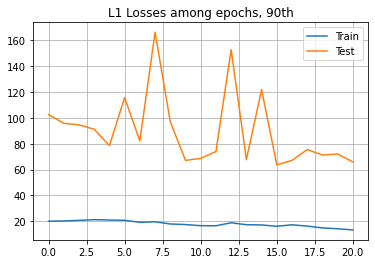

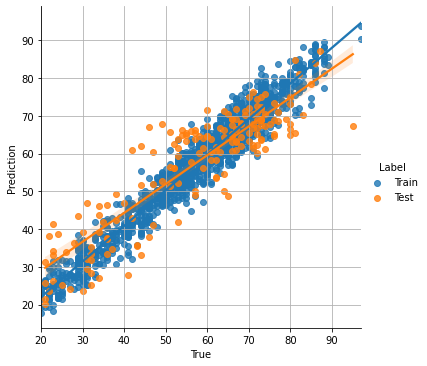

Saving ...
Epoch 92 / 100, BEST MAE 6.368
[train] 129.1 sec [valid] 15.8 sec 
[TRAIN]:: Loss=12.326 Mae=2.745 Rmse=3.296 Corr=0.977 
[TEST ]:: Loss=98.976 Mae=7.595 Rmse=9.898 Corr=0.853 
Epoch 93 / 100, BEST MAE 6.368
[train] 130.6 sec [valid] 15.9 sec 
[TRAIN]:: Loss=12.147 Mae=2.726 Rmse=3.292 Corr=0.977 
[TEST ]:: Loss=76.817 Mae=7.109 Rmse=8.624 Corr=0.884 
Epoch 94 / 100, BEST MAE 6.368
[train] 129.0 sec [valid] 15.5 sec 
[TRAIN]:: Loss=10.212 Mae=2.506 Rmse=3.020 Corr=0.981 
[TEST ]:: Loss=67.684 Mae=6.529 Rmse=8.134 Corr=0.887 
Epoch 95 / 100, BEST MAE 6.368
[train] 129.3 sec [valid] 15.6 sec 
[TRAIN]:: Loss=11.691 Mae=2.606 Rmse=3.254 Corr=0.978 
[TEST ]:: Loss=66.803 Mae=6.530 Rmse=8.068 Corr=0.889 
Epoch 96 / 100, BEST MAE 6.368
[train] 129.4 sec [valid] 15.6 sec 
[TRAIN]:: Loss=10.975 Mae=2.591 Rmse=3.122 Corr=0.979 
[TEST ]:: Loss=66.543 Mae=6.438 Rmse=8.037 Corr=0.888 


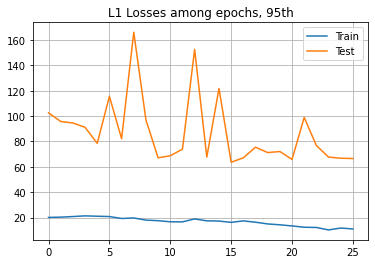

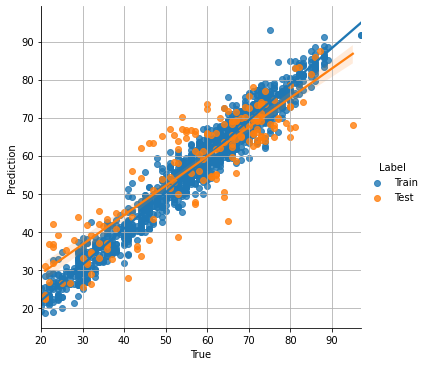

Saving ...
Epoch 97 / 100, BEST MAE 6.368
[train] 130.4 sec [valid] 15.6 sec 
[TRAIN]:: Loss=9.942 Mae=2.417 Rmse=2.996 Corr=0.981 
[TEST ]:: Loss=67.484 Mae=6.535 Rmse=8.075 Corr=0.887 
Epoch 98 / 100, BEST MAE 6.368
[train] 129.0 sec [valid] 15.6 sec 
[TRAIN]:: Loss=9.536 Mae=2.410 Rmse=2.952 Corr=0.982 
[TEST ]:: Loss=79.504 Mae=7.227 Rmse=8.762 Corr=0.878 
Epoch 99 / 100, BEST MAE 6.368
[train] 130.0 sec [valid] 15.5 sec 
[TRAIN]:: Loss=9.820 Mae=2.434 Rmse=3.009 Corr=0.981 
[TEST ]:: Loss=69.422 Mae=6.650 Rmse=8.180 Corr=0.893 
Epoch 100 / 100, BEST MAE 6.368
[train] 129.0 sec [valid] 15.5 sec 
[TRAIN]:: Loss=9.754 Mae=2.459 Rmse=2.998 Corr=0.982 
[TEST ]:: Loss=71.873 Mae=6.743 Rmse=8.335 Corr=0.881 
Saving ...


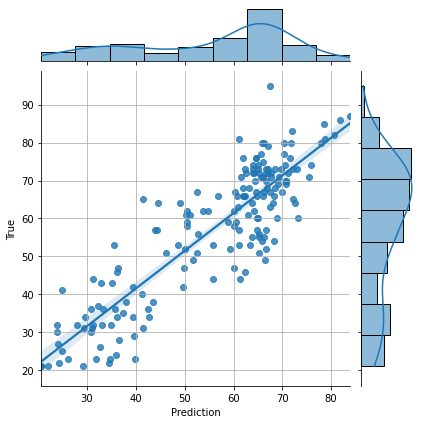

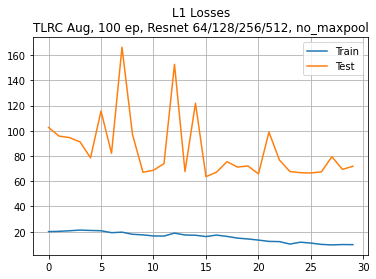

In [7]:
fold = None
# cfg.epochs = 200
e = 70
db = make_db(page, client=client, schema=cfg['notion']['no_fold_aug_schema'], title='Results') if cfg['notion']['use'] else None
for e in range(e, cfg.epochs):
    
    start_time = time.time()
    print(f'Epoch {e+1} / {cfg.epochs}, BEST MAE {cfg.best_mae:.3f}')
    
    model, trn_dp, trn_res = train(model, optimizer, fn_lst, trn_dp, cfg, fold=fold, augment=True)
    model, tst_dp, tst_res = valid(model, fn_lst, tst_dp, cfg, fold=fold)
    elapsed_time = round(time.time() - start_time, 3)
       
    if cfg.best_mae > tst_dp.mae[-1]:
        
        cfg.best_mae = tst_dp.mae[-1]
        model_name = f'{cfg.model_name}_ep{e}-{cfg.epochs}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_date}/', is_best=True)
        
    df = pd.concat([make_df(trn_res, 'Train'),
                    make_df(tst_res, 'Test')], ignore_index=True)
    
    trn_dp.corr.update(df[df['Label'] == 'Train'].corr().Prediction['True'])
    trn_dp.refresh()
    tst_dp.corr.update(df[df['Label'] == 'Test'].corr().Prediction['True'])
    tst_dp.refresh()

    if e % 1 == 0:
        trn_dp.info('train')
        tst_dp.info('test ')

    if e % cfg.verbose_period == 0:
        plt.title(f"L1 Losses among epochs, {e}th")
        plt.plot(list(trn_dp.loss), label='Train')
        plt.plot(list(tst_dp.loss), label='Test')
        plt.grid(); plt.legend()

        sns.lmplot(data=df, x='True', y='Prediction', hue='Label')
        plt.grid()
        plt.show()
        
        model_name = f'{cfg.model_name}_ep{e}-{str(cfg.epochs).zfill(3)}_sd{cfg.seed}_mae{cfg.best_mae:.3f}.pth'
        save_checkpoint(model.state_dict(), model_name, model_dir=f'./result/models/{run_date}/', is_best=False)
        
        if db:
            data = gather_data(e=e, time=elapsed_time, cfg=cfg,
                               train=trn_dp, valid=tst_dp)
            write_db(db, data)
    
    metrics = mlflow_data(time=elapsed_time, train=trn_dp, valid=tst_dp)
    mlflow.log_metrics(metrics, e)
    
    torch.cuda.empty_cache()
    
# Save Parameters to MLFlow
cfg.best_mae = min(tst_dp.mae)
cfg.refresh()
params = dict()
for name, value in cfg.get_dict().items():
    if name not in ['notion']:  
        params[name] = str(value)
mlflow.log_params(params)

save_checkpoint(cfg.get_dict(), 'cfg.pt', model_dir=f'./result/models/{run_date}/', is_best=True)

# Save Plots to MLFlow
sns.jointplot(data=df[df['Label'] == 'Test'], x='Prediction', y='True', kind='reg')
plt.grid()
plt.savefig(f'./result/models/{run_date}/test_jointplot.png')
plt.show()
# mlflow.log_artifact(f'./result/models/{run_date}/test_jointplot.png')
plt.close()

plt.title(f"L1 Losses\n{condition}")
plt.plot(list(trn_dp.loss), label='Train')
plt.plot(list(tst_dp.loss), label='Test')
plt.grid(); plt.legend()
plt.savefig(f'./result/models/{run_date}/loss_plot.png')
plt.show()
# mlflow.log_artifact(f'./result/models/{run_date}/loss_plot.png')

mlflow.end_run()

### kFold

In [8]:
models  = []
packets = []
tst_dp = DataPacket()

#### Whole Run

In [9]:
# test_db = make_db(page, client=client, schema=cfg['notion']['test_schema'], title='Test') if cfg['notion']['use'] else None
test_db = page.children[2]
fold_db = make_db(page, client=client, schema=cfg['notion']['schema'], title=f'Fold {fold+1}') if cfg['notion']['use'] else None

In [ ]:
for fold in range(16, cfg.folds):
    
    print(f'Fold {fold+1} / {cfg.folds}')
    mlflow.start_run(run_name=f'{today()} Fold {fold+1}')
    mlflow.log_params(params)
    mlflow.set_tags({
        'fold': fold+1
    })

    model, dps, res = run(cfg, fold, fold_db, mlflow=mlflow)
    models.append(model)
    packets.append(dps)
    
    cfg.test = True
    model, tst_dp, tst_res = eval(model, fn_lst, tst_dp, cfg, fold=None)
    
    df = pd.concat([make_df(res[0], 'Train'),
                   make_df(res[1], 'Valid'),
                   make_df(tst_res, 'Test')], ignore_index=True)
    
    tst_dp.corr.update(df[df['Label'] == 'Test'].corr().Prediction['True'])
    tst_dp.refresh()
    
    # Show Holdout testset information
    tst_dp.info('Holdout test')
    sns.lmplot(data=df, x='True', y='Prediction', hue='Label')
    plt.grid()
    plt.show()
    
    if test_db:
        data = gather_data(f=fold, test=tst_dp)
        write_db(test_db, data)
    
    torch.cuda.empty_cache()
    clear_output(wait=True)

## Inference

In [8]:
dset = DatasetPlus(cfg, augment=False, test=True)
dataloader = DataLoader(dset, batch_size=cfg.batch_size)

device = cfg.device
model.eval()
predictions, targets = [], []
with torch.no_grad():
    for i, (x, y) in enumerate(dataloader):
        
        x, y = x.to(device), y.to(device)
        y_pred = model.forward(x).to(device).squeeze()
        predictions.append(y_pred.cpu())
        targets.append(y.cpu())
torch.cuda.empty_cache()

predictions = torch.cat(predictions).detach().numpy()
targets = torch.cat(targets).detach().numpy()

In [15]:
results = pd.DataFrame([predictions, targets, dset.data_files], index=['predictions', 'targets', 'fname']).T

In [17]:
results['diff'] = results.targets - results.predictions

<AxesSubplot:>

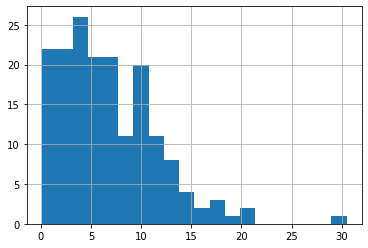

In [29]:
results['abs_diff'].hist(bins=20)

In [33]:
problematic = results[results['abs_diff'] > 10]

In [32]:
from utils.slice_viewer import *

In [36]:
sv = SliceViewer(problematic.iloc[0, 2])

In [ ]:
for fname in problematic.fname.values:
    
    SliceViewer(fname).triple_view()

## Ensemble

### Naive Averaging

In [39]:
# Ensemble
preds = dict()
models = glob('./models/ensembles/*.pth')
for fold, state in enumerate(models):
    
    model, device = load_model('resnet', verbose=False)
    model = torch.load(state)
    
    model, (_, _, _), tst_preds = eval(model, True, None, None, resize, device, batch_size,
                                      loss_fn, mae_fn, rmse_fn,
                                      [], [], [])
    
    preds[f'model_{fold}'] = list(map(float, tst_preds[1]))
    
ensemble_results = pd.DataFrame(preds)
ensemble_results['Avg'] = ensemble_results.mean(axis=1)
ensemble_results['True'] = list(map(float, tst_preds[0]))

Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.


In [64]:
def result_plot(df):
    
    avg = torch.Tensor(ensemble_results['Avg'])
    tru = torch.Tensor(ensemble_results['True'])
    
    corr = ensemble_results.corr()['True']['Avg']
    mae_fn, rmse_fn = nn.L1Loss(), RMSELoss()
    
    print(f'Ensemble Results')
    print(f'MAE  = {float(mae_fn(avg, tru)):.3f}')
    print(f'RMSE = {float(rmse_fn(avg, tru)):.3f}')
    print(f'CORR = {corr:.3f}')
    
    sns.lmplot(data=ensemble_results, x='True', y='Avg')
    plt.grid()
    plt.show()

Ensemble Results
MAE  = 7.025
RMSE = 8.598
CORR = 0.854


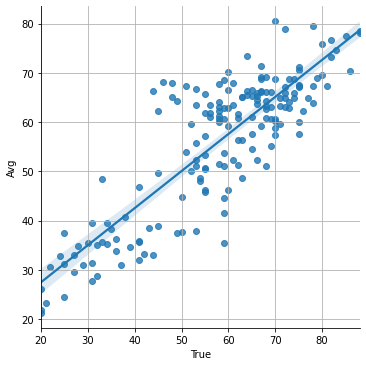

In [65]:
result_plot(ensemble_results)

### Blender

In [7]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x

In [8]:
class CFG:
    
    model_name='resnet'
    dropout=0.1
    use_last_layer=True

In [10]:
class Ensemble(nn.Module):
    
    def __init__(self, model_list, CFG):
        super(Ensemble, self).__init__()
        
        self.cfg = CFG
        self.dropout = self.cfg.dropout
        self.models = dict()
        
        for idx, model_path in enumerate(model_list):
            
            model, device = load_model(self.cfg.model_name, verbose=False)
            model = torch.load(model_path)
            if not self.cfg.use_last_layer:
                model.fc = Identity()
                
                self.last_layer = nn.Sequential(
                    nn.Linear(len(model_list) * 128, 128),
                    nn.Dropout(self.dropout),
                    nn.Linear(128, 1)
#                     nn.Dropout(self.dropout)
                )
                
            else:
                self.last_layer = nn.Sequential(
                    nn.Linear(len(model_list), 1),
#                     nn.Dropout(self.dropout)
                )
                
            for param in model.parameters():
                param.requires_grad = False
                
            self.models[idx] = model
        
    def forward(self, x):
        
        vectors = list()
        for idx, model in self.models.items():
            vectors.append(model(x))
            
        x = torch.cat(vectors, dim=1)
        x = self.last_layer(x)
        
        return x

In [11]:
model_list = glob('./models/ensembles/rough/*.pth')
model_list.sort()
cfg = CFG()
cfg.use_last_layer = True
model = Ensemble(model_list, cfg).to(device)
with torch.no_grad():
    model.last_layer[0].weight.fill_(1 / len(model_list))
optimizer = optim.Adam(model.parameters(), lr=1e-4)

Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.
Model Resnet is selected.


## SFCN Test

In [53]:
resnet, _ = load_model('resnet', verbose=True)

Model Resnet is selected.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 96, 48, 48]           2,352
       BatchNorm3d-2       [-1, 16, 96, 48, 48]              32
              ReLU-3       [-1, 16, 96, 48, 48]               0
         MaxPool3d-4       [-1, 16, 48, 24, 24]               0
            Conv3d-5       [-1, 16, 48, 24, 24]           6,912
       BatchNorm3d-6       [-1, 16, 48, 24, 24]              32
              ReLU-7       [-1, 16, 48, 24, 24]               0
            Conv3d-8       [-1, 16, 48, 24, 24]           6,912
       BatchNorm3d-9       [-1, 16, 48, 24, 24]              32
             ReLU-10       [-1, 16, 48, 24, 24]               0
       BasicBlock-11       [-1, 16, 48, 24, 24]               0
           Conv3d-12       [-1, 32, 24, 12, 12]          13,824
      BatchNorm3d-13       [-1, 32, 24, 12, 12]              64
             

In [119]:
cfg.model_name = 'sfcn'
model, cfg.device = load_model(cfg.model_name, verbose=False)
optimizer = optim.Adam(model.parameters(), lr=cfg.learning_rate)

Model Sfcn is selected.


In [120]:
state_dict = torch.load('../UKBiobank_deep_pretrain/brain_age/run_20190719_00_epoch_best_mae.p')
state_dict = dict(state_dict)
keys = list(map(lambda x: x.split('module.')[-1], state_dict.keys()))
state_dict = {k: v for k, v in zip(keys, state_dict.values())}
model.load_state_dict(state_dict)

<All keys matched successfully>

In [52]:
summary(model, input_size=(1, 160, 192, 160))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1    [-1, 32, 160, 192, 160]             896
       BatchNorm3d-2    [-1, 32, 160, 192, 160]              64
         MaxPool3d-3       [-1, 32, 80, 96, 80]               0
              ReLU-4       [-1, 32, 80, 96, 80]               0
            Conv3d-5       [-1, 64, 80, 96, 80]          55,360
       BatchNorm3d-6       [-1, 64, 80, 96, 80]             128
         MaxPool3d-7       [-1, 64, 40, 48, 40]               0
              ReLU-8       [-1, 64, 40, 48, 40]               0
            Conv3d-9      [-1, 128, 40, 48, 40]         221,312
      BatchNorm3d-10      [-1, 128, 40, 48, 40]             256
        MaxPool3d-11      [-1, 128, 20, 24, 20]               0
             ReLU-12      [-1, 128, 20, 24, 20]               0
           Conv3d-13      [-1, 256, 20, 24, 20]         884,992
      BatchNorm3d-14      [-1, 256, 20,

In [122]:
cfg.test = True
test_dset = MyDataset(cfg, augment=False, fold=None)
test_dl = DataLoader(test_dset, batch_size=16)

In [123]:
from tqdm import tqdm

In [124]:
mae = nn.L1Loss()

In [125]:
len(test_dl)

175

In [141]:
model.to(cfg.device)
model.eval()
y_preds, ys = [], []
age_bins = torch.tensor([42+i for i in range(40)])
with torch.no_grad(): # to not give loads on GPU... :(
    for i, (x, y) in tqdm(enumerate(test_dl)):

        x, y = F.interpolate(x, size=(160, 192, 160)).to(cfg.device), y.to(cfg.device)

        y_pred = model.forward(x)[0].to(cfg.device)
        y_pred = (np.exp(y_pred.squeeze().cpu()) * age_bins).sum()
#         y_pred = y_pred.max(axis=1).indices.squeeze()
#         y_pred += 42
        y_preds.append(y_pred)
        ys.append(y.squeeze())
#             loss = mae(y_pred, y.squeeze())


torch.cuda.empty_cache()

175it [01:34,  1.85it/s]
